In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [38]:
df=pd.read_csv('crop_recommendation_dataset.csv')
df

Temperature   Humidity    Rainfall        PH  Nitrogen  Phosphorous  \
0       20.879744  82.002744  202.935536  6.502985   69.3000     79.50000   
1       21.770462  80.319644  226.655537  7.038096   72.0200    141.82400   
2       23.004459  82.320763  263.964248  7.633568   77.7700     59.39000   
3       26.491096  80.283629  242.864034  6.980401   78.6500    147.45895   
4       20.280071  81.604873  262.717340  7.628473   73.9800     68.95000   
...           ...        ...         ...       ...       ...          ...   
3095    25.287846  89.636679   58.286977  6.765095   57.3400    144.48000   
3096    26.638386  84.695469   48.324286  6.189214   56.0600     61.34000   
3097    25.331045  84.305338   41.532187  6.904242   54.9395    145.53795   
3098    26.820601  83.892415   43.971937  6.463271   55.5100     76.89000   
3099    26.820601  89.413849   58.548767  6.260839   57.6525     66.29000   

      Potassium  Carbon          Soil        Crop  
0       94.4400    0.63    Loamy Soil        rice  
1      141.6978    1.40    Loamy Soil        rice  
2       81.8900    1.80    Peaty Soil        rice  
3      142.9430    1.43    Loamy Soil        rice  
4       95.7400    1.75    Peaty Soil        rice  
...         ...     ...           ...         ...  
3095    73.0800    1.64  Neutral Soil  watermelon  
3096    47.9500    1.35    Peaty Soil  watermelon  
3097    97.8300    1.58  Neutral Soil  watermelon  
3098    50.9200    0.68   Acidic Soil  watermelon  
3099    50.5600    1.49   Acidic Soil  watermelon  

[3100 rows x 10 columns]

In [42]:
df.shape

(3100, 10)

In [46]:
df.isnull().sum()

Temperature    0
Humidity       0
Rainfall       0
PH             0
Nitrogen       0
Phosphorous    0
Potassium      0
Carbon         0
Soil           0
Crop           0
dtype: int64

In [52]:
df.duplicated().sum()

np.int64(0)

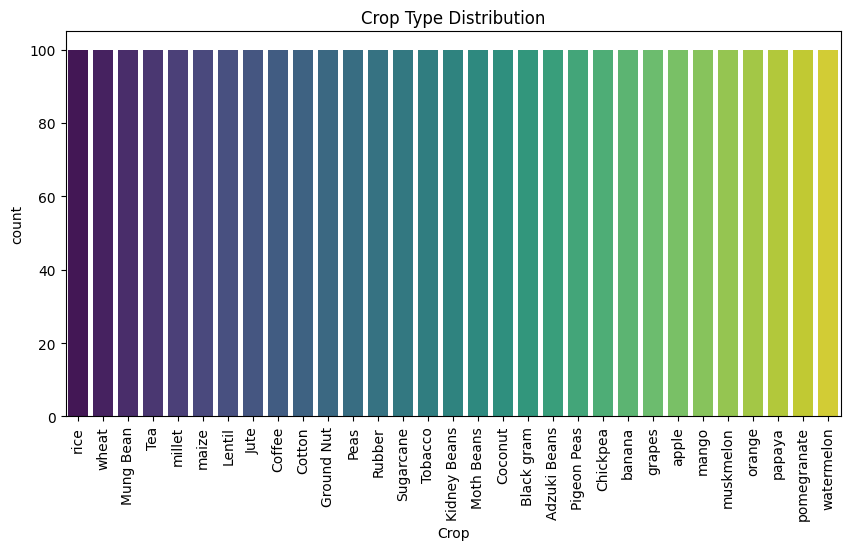

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(x='Crop', data=df, order=df['Crop'].value_counts().index,hue='Crop', palette='viridis')
plt.xticks(rotation=90)
plt.title('Crop Type Distribution')
plt.show()

In [68]:
df['Crop'].value_counts()

Crop
rice            100
wheat           100
Mung Bean       100
Tea             100
millet          100
maize           100
Lentil          100
Jute            100
Coffee          100
Cotton          100
Ground Nut      100
Peas            100
Rubber          100
Sugarcane       100
Tobacco         100
Kidney Beans    100
Moth Beans      100
Coconut         100
Black gram      100
Adzuki Beans    100
Pigeon Peas     100
Chickpea        100
banana          100
grapes          100
apple           100
mango           100
muskmelon       100
orange          100
papaya          100
pomegranate     100
watermelon      100
Name: count, dtype: int64

In [70]:
df['Soil'].value_counts()

Soil
Acidic Soil      1519
Peaty Soil        537
Neutral Soil      510
Loamy Soil        489
Alkaline Soil      45
Name: count, dtype: int64

In [72]:
df = pd.get_dummies(df, columns=['Soil'], dtype=np.float64)

In [74]:
df.head()

Temperature   Humidity    Rainfall        PH  Nitrogen  Phosphorous  \
0    20.879744  82.002744  202.935536  6.502985     69.30     79.50000   
1    21.770462  80.319644  226.655537  7.038096     72.02    141.82400   
2    23.004459  82.320763  263.964248  7.633568     77.77     59.39000   
3    26.491096  80.283629  242.864034  6.980401     78.65    147.45895   
4    20.280071  81.604873  262.717340  7.628473     73.98     68.95000   

   Potassium  Carbon  Crop  Soil_Acidic Soil  Soil_Alkaline Soil  \
0    94.4400    0.63  rice               0.0                 0.0   
1   141.6978    1.40  rice               0.0                 0.0   
2    81.8900    1.80  rice               0.0                 0.0   
3   142.9430    1.43  rice               0.0                 0.0   
4    95.7400    1.75  rice               0.0                 0.0   

   Soil_Loamy Soil  Soil_Neutral Soil  Soil_Peaty Soil  
0              1.0                0.0              0.0  
1              1.0                0.0              0.0  
2              0.0                0.0              1.0  
3              1.0                0.0              0.0  
4              0.0                0.0              1.0

In [76]:
soil_mapping = {
    'Soil_Acidic Soil': 'Acidic_Soil',
    'Soil_Alkaline Soil': 'Alkaline_Soil',
    'Soil_Loamy Soil': 'Loamy_Soil',
    'Soil_Neutral Soil': 'Neutral_Soil',
    'Soil_Peaty Soil': 'Peaty_Soil'
}

In [80]:
df.rename(columns=soil_mapping,inplace=True)

In [82]:
df.head()

Temperature   Humidity    Rainfall        PH  Nitrogen  Phosphorous  \
0    20.879744  82.002744  202.935536  6.502985     69.30     79.50000   
1    21.770462  80.319644  226.655537  7.038096     72.02    141.82400   
2    23.004459  82.320763  263.964248  7.633568     77.77     59.39000   
3    26.491096  80.283629  242.864034  6.980401     78.65    147.45895   
4    20.280071  81.604873  262.717340  7.628473     73.98     68.95000   

   Potassium  Carbon  Crop  Acidic_Soil  Alkaline_Soil  Loamy_Soil  \
0    94.4400    0.63  rice          0.0            0.0         1.0   
1   141.6978    1.40  rice          0.0            0.0         1.0   
2    81.8900    1.80  rice          0.0            0.0         0.0   
3   142.9430    1.43  rice          0.0            0.0         1.0   
4    95.7400    1.75  rice          0.0            0.0         0.0   

   Neutral_Soil  Peaty_Soil  
0           0.0         0.0  
1           0.0         0.0  
2           0.0         1.0  
3           0.0         0.0  
4           0.0         1.0

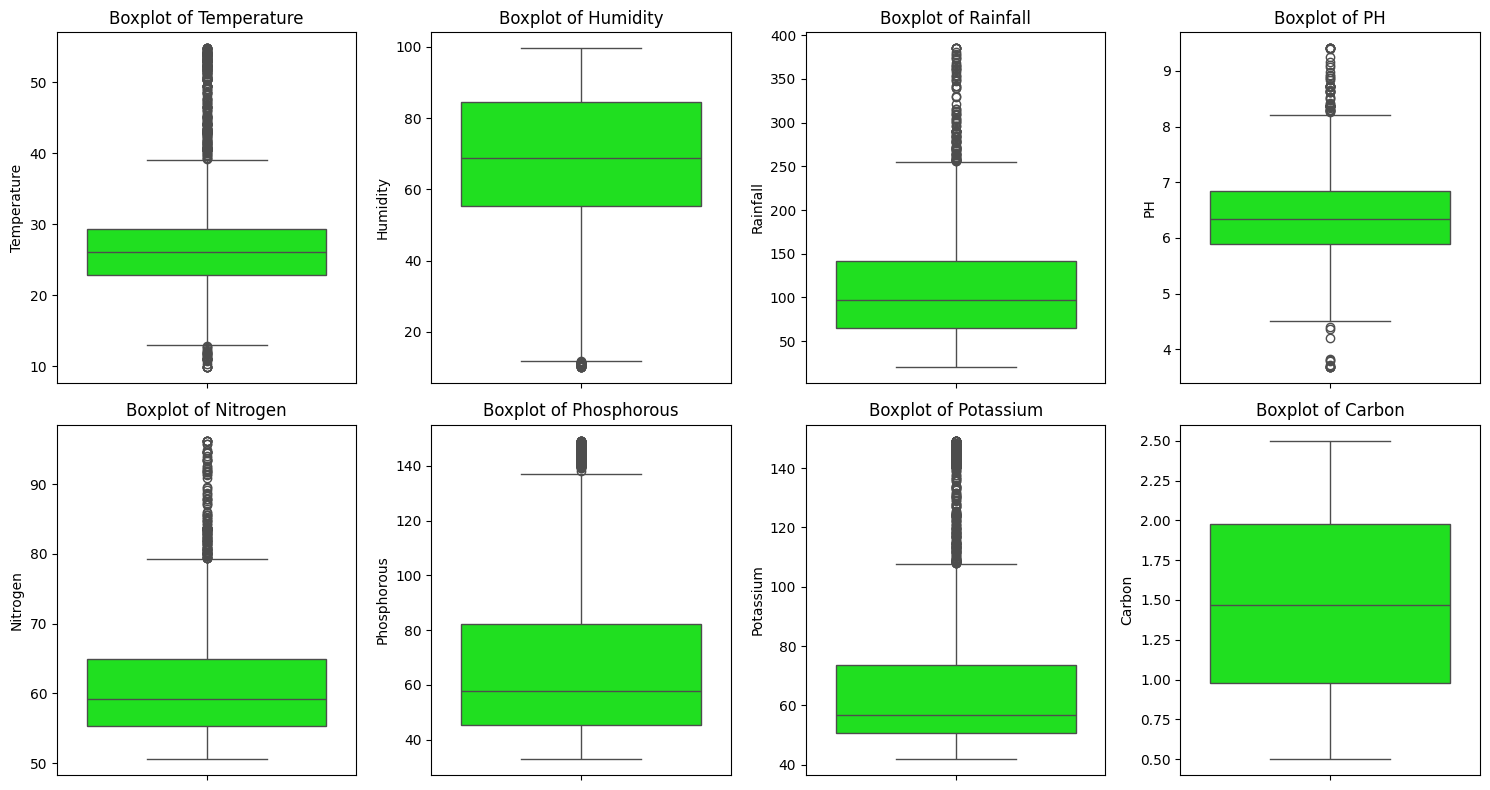

In [86]:
# Boxplots to detect outliers
plt.figure(figsize=(15,8))
for i, col in enumerate(['Temperature', 'Humidity','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon']):
    plt.subplot(2,4,i+1)
    sns.boxplot(y=df[col],color='lime')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [90]:
# Handle Outliers
# IQR Method to identify and cap Outliers
def cap_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)


for col in ['Temperature', 'Humidity','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon']:
    cap_outliers(df, col)

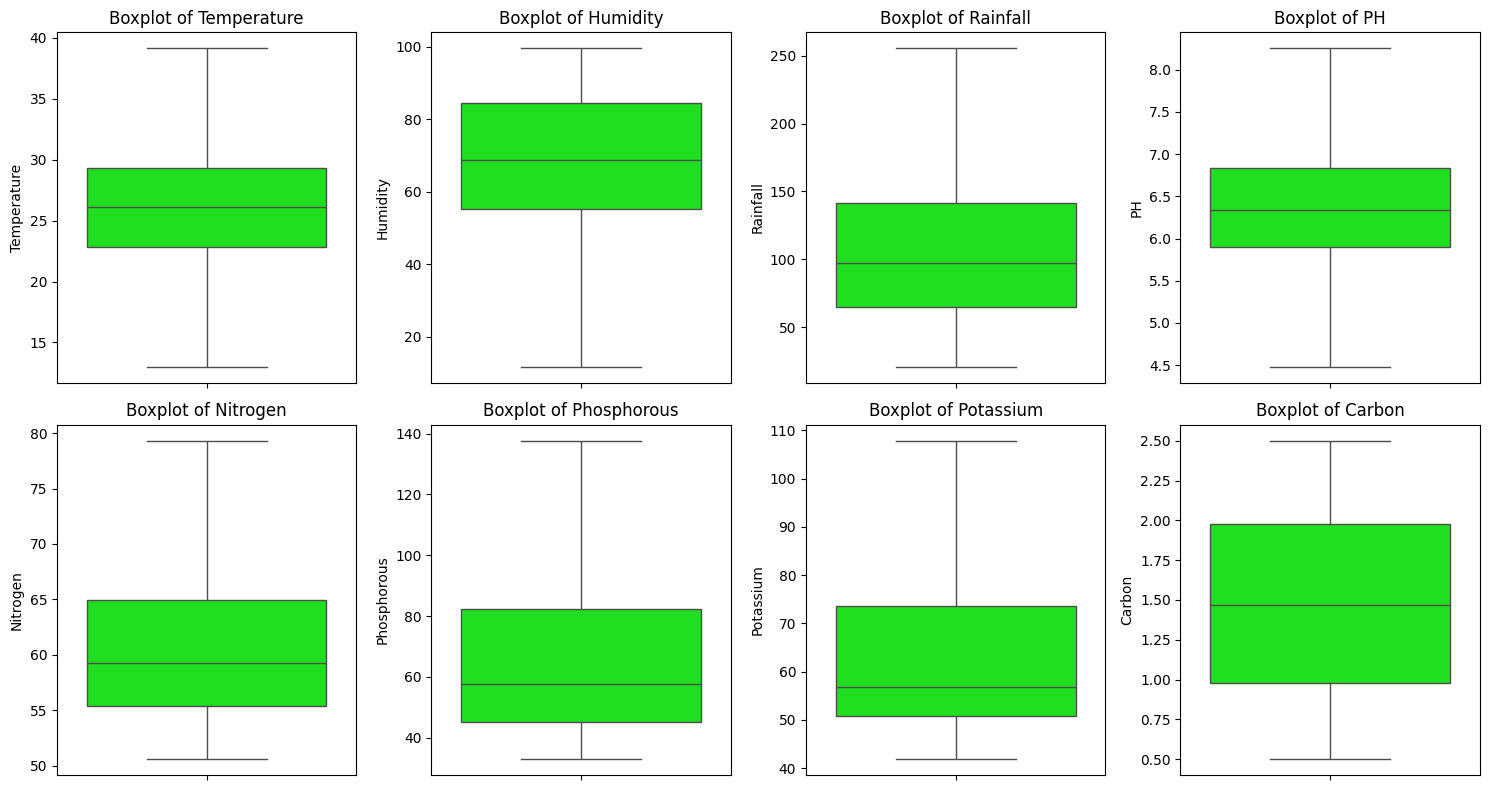

In [94]:
# Boxplot
plt.figure(figsize=(15,8))
for i, col in enumerate(['Temperature', 'Humidity','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon']):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df[col],color='lime')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

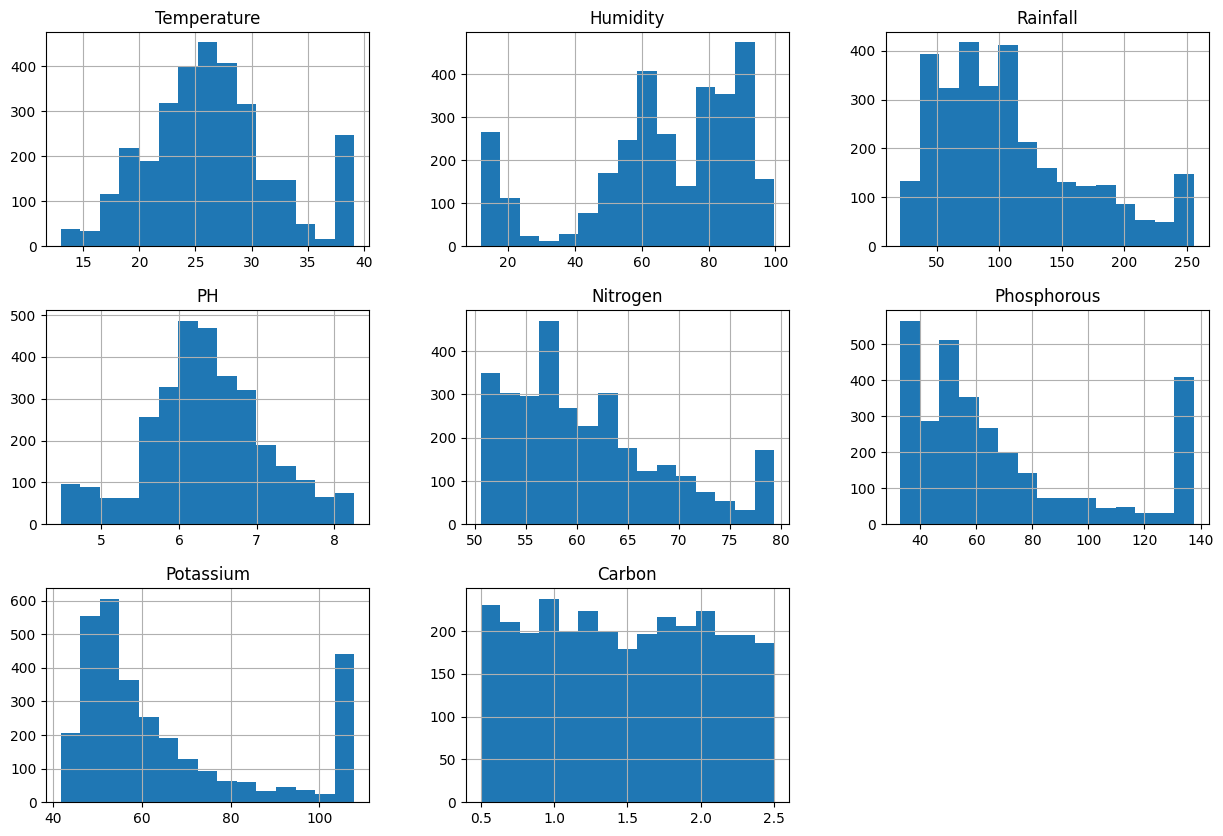

In [98]:
# Histograms for the numerical cols
df[['Temperature', 'Humidity','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon']].hist(bins=15, figsize=(15, 10))
plt.show()

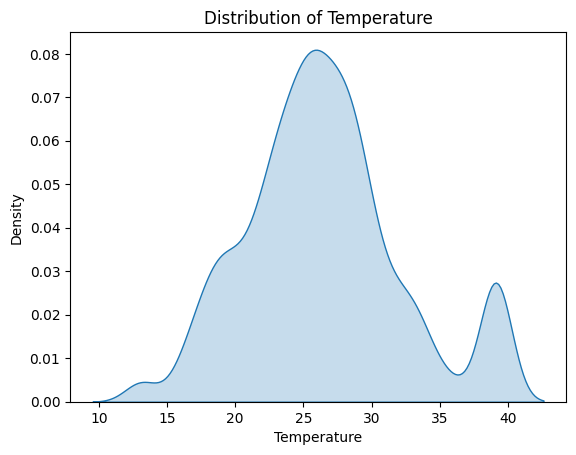

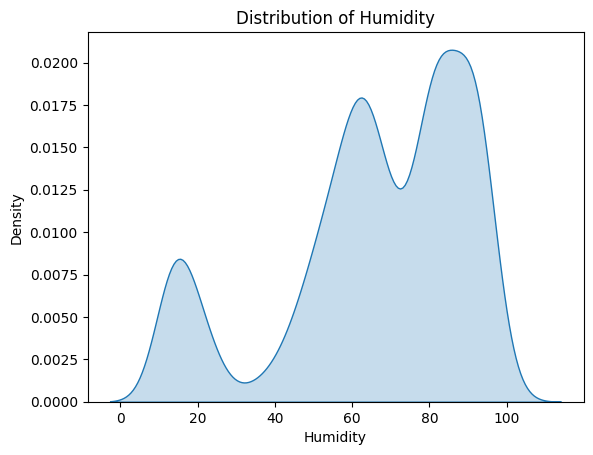

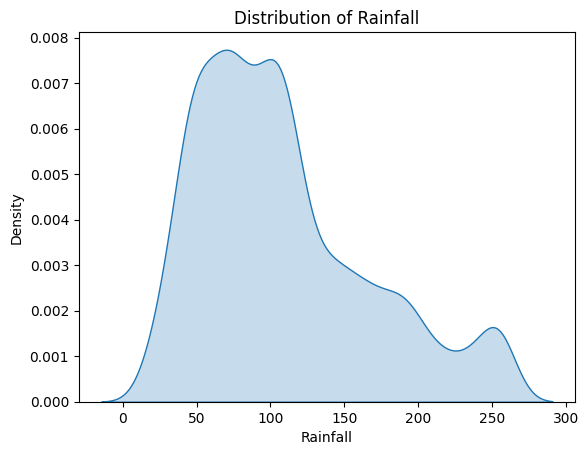

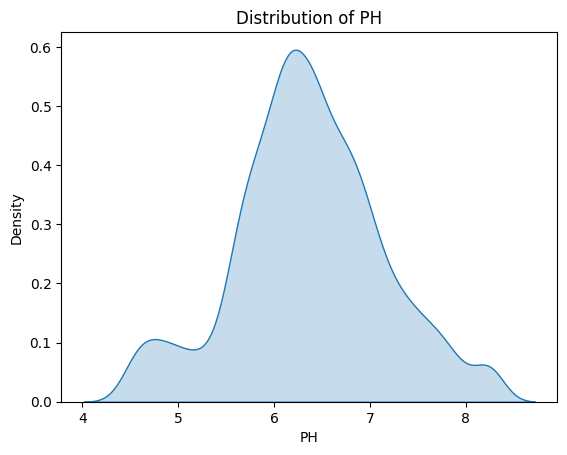

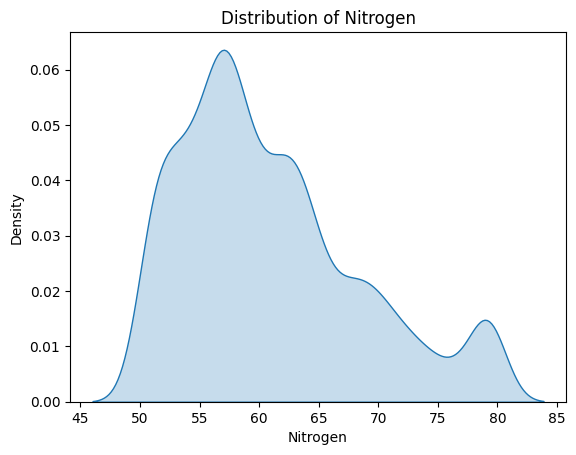

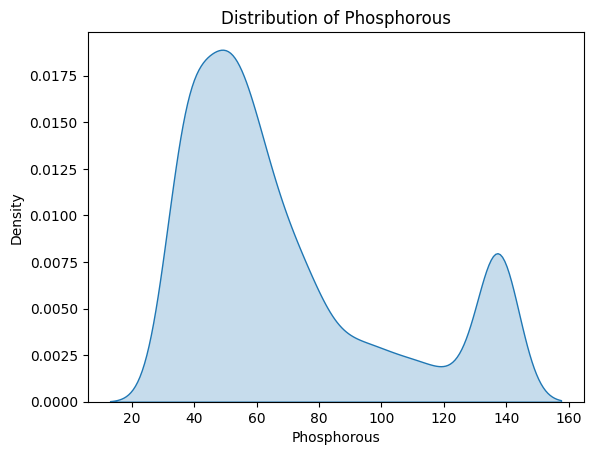

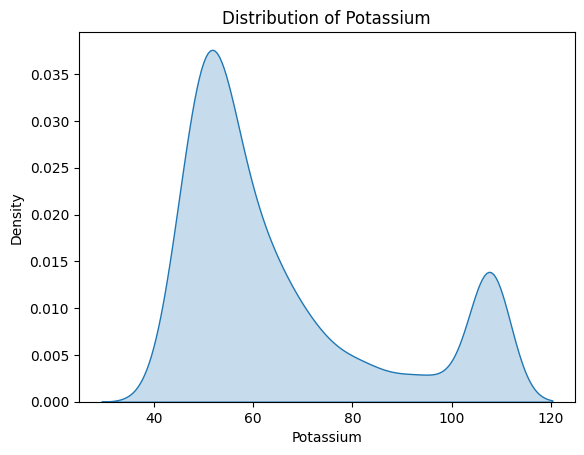

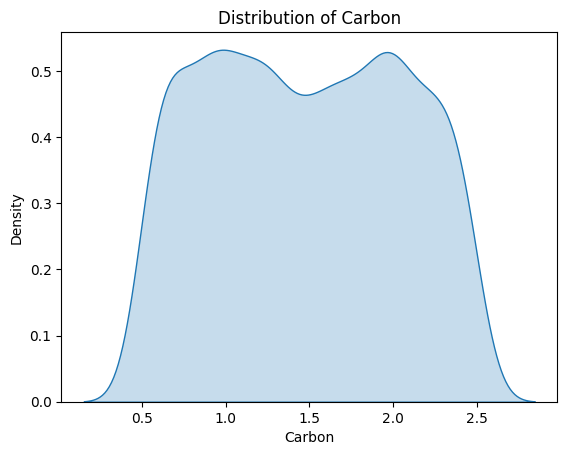

In [102]:
# KDE plots for numerical features
for col in['Temperature', 'Humidity','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon']:
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Distribution of {col}')
    plt.show()

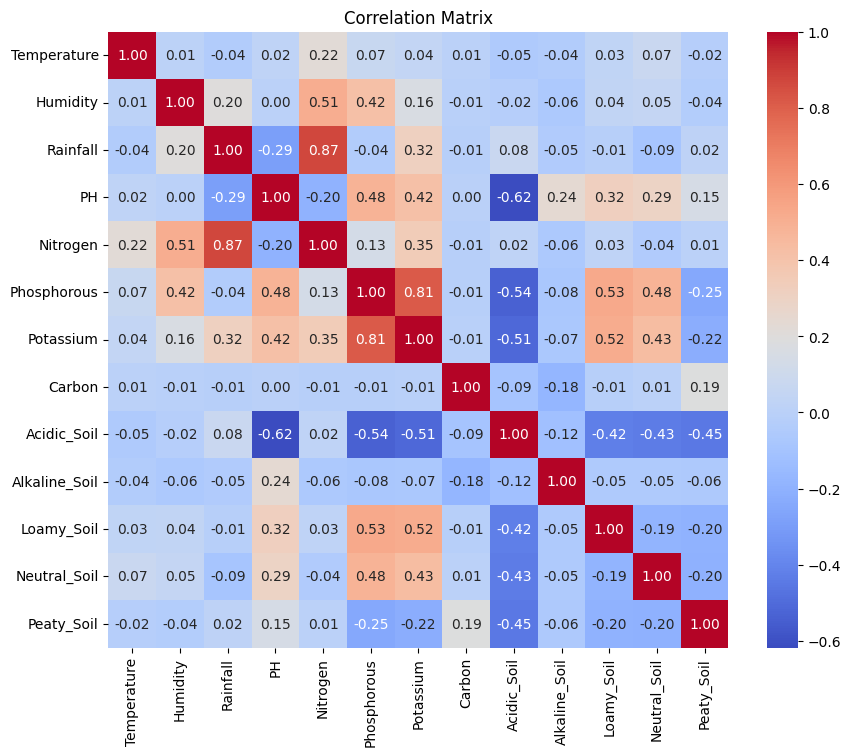

In [106]:
# Select only numeric cols
numeric_data = df.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

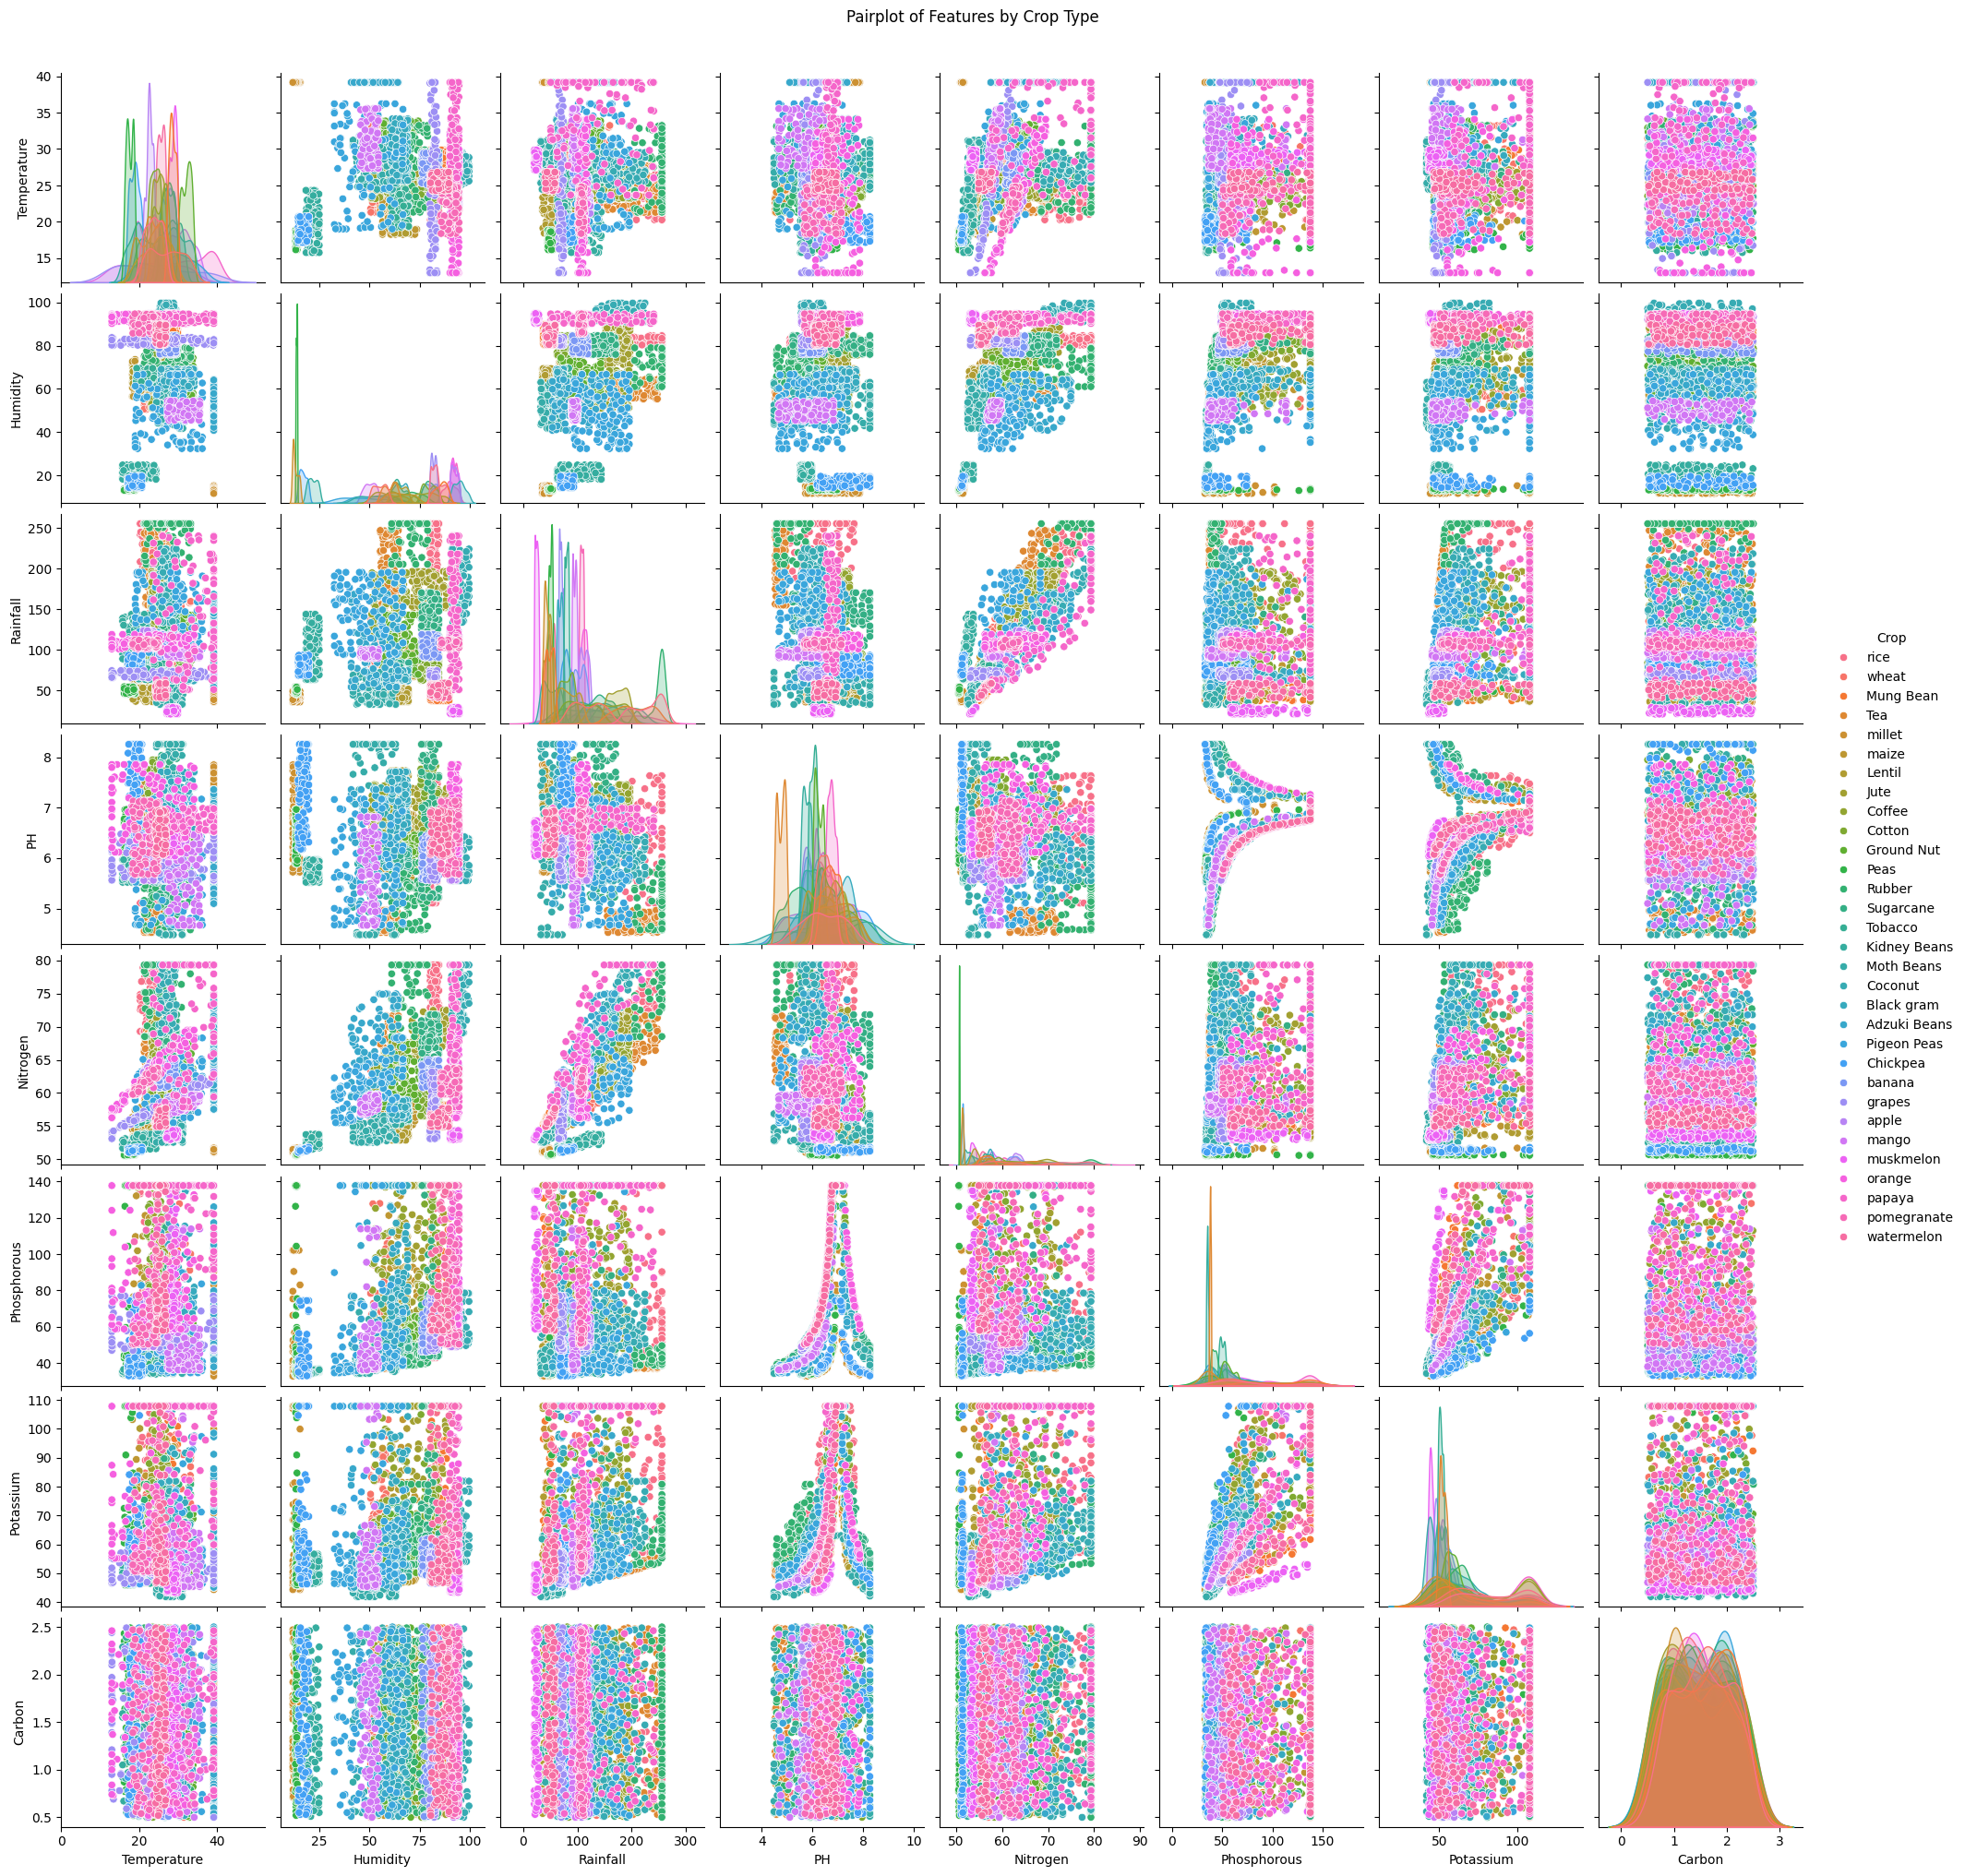

In [108]:
# Pairplot
sns.pairplot(
    df, 
    vars=['Temperature', 'Humidity','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon'],
    hue='Crop', 
    palette='husl'
)
plt.suptitle("Pairplot of Features by Crop Type", y=1.02)
plt.show()

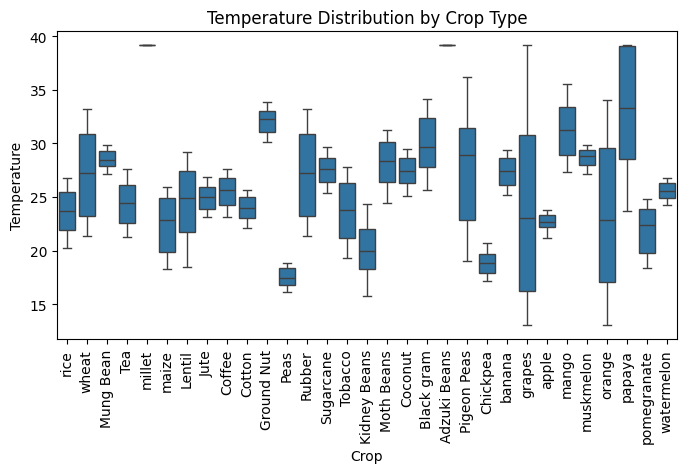

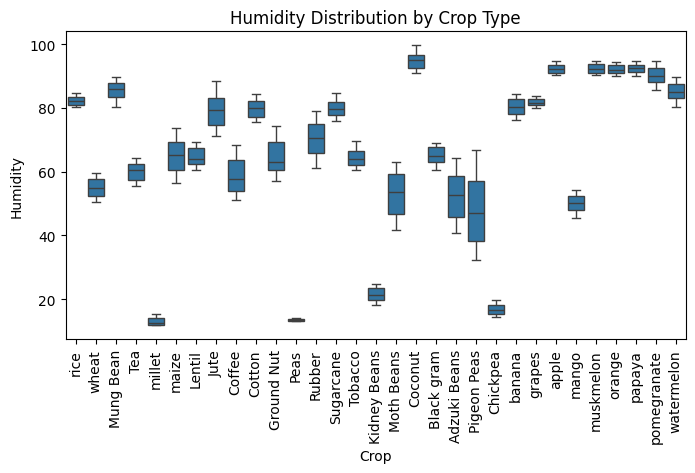

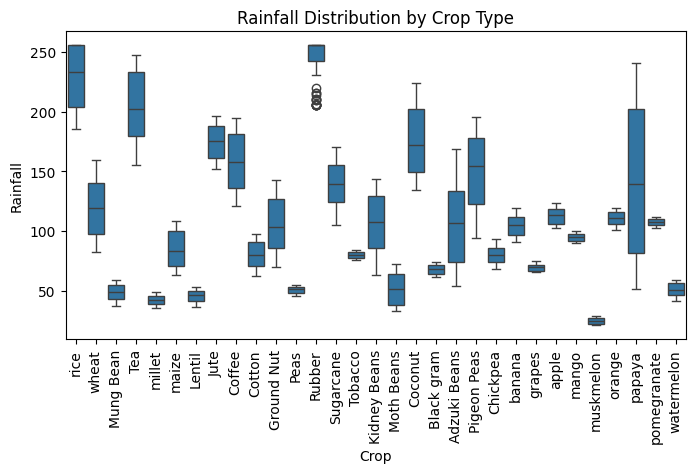

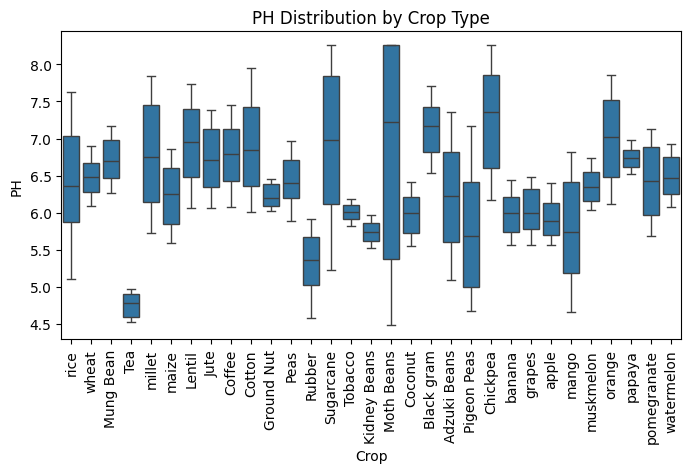

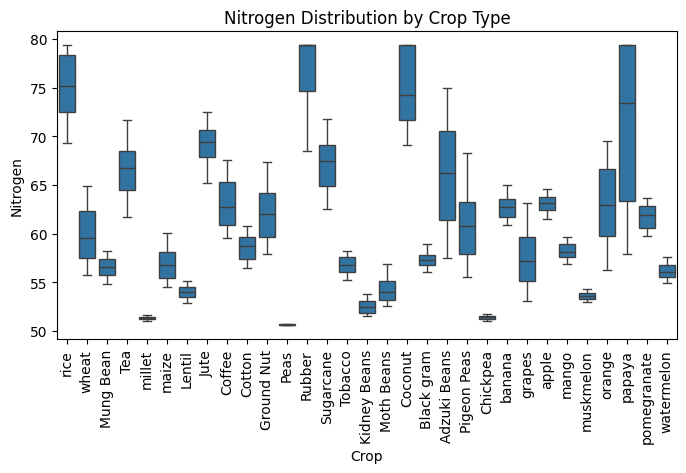

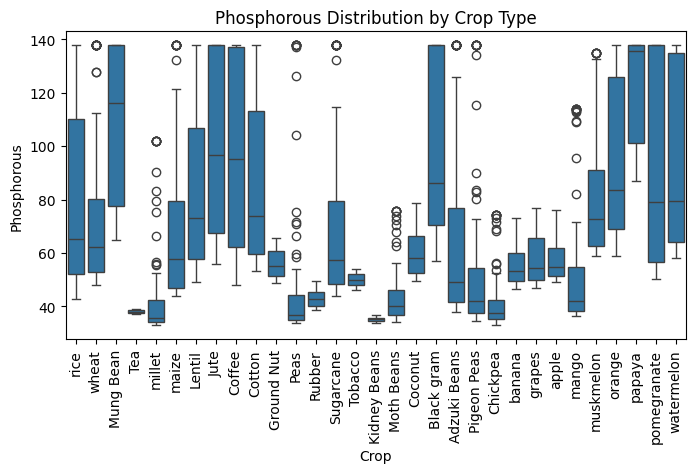

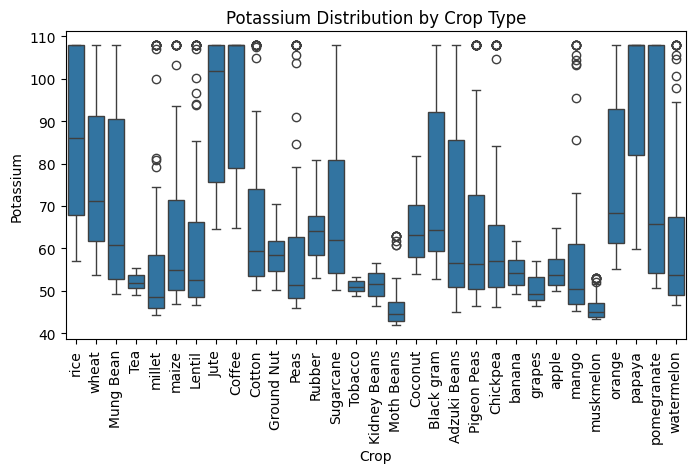

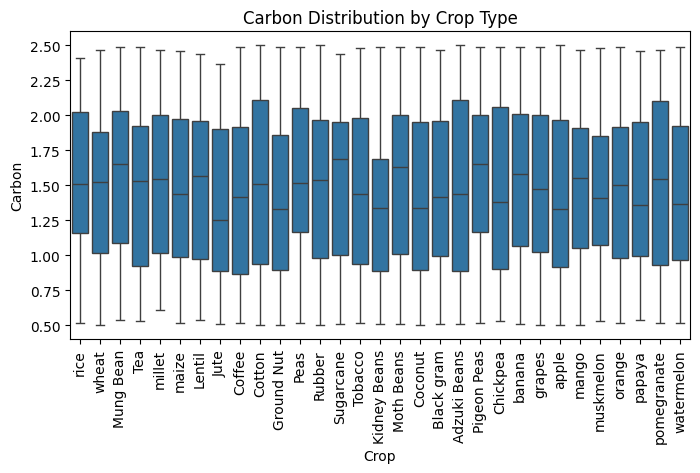

In [110]:
# Boxplots of features grouped by crop
for col in ['Temperature', 'Humidity','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Crop', y=col, data=df)
    plt.xticks(rotation=90)
    plt.title(f'{col} Distribution by Crop Type')
    plt.show()

              Temperature   Humidity    Rainfall        PH   Nitrogen  \
Crop                                                                    
Adzuki Beans    39.143926  52.431359  106.801137  6.204823  66.206100   
Black gram      29.963671  65.105194   67.900484  7.133170  57.347575   
Chickpea        18.866656  16.858359   80.128999  7.289117  51.408525   
Coconut         27.403552  94.856484  175.792420  5.975600  74.848575   
Coffee          25.535836  58.864801  158.131477  6.791200  63.209100   
Cotton          23.985075  79.846860   80.372270  6.916085  58.558475   
Ground Nut      32.082926  64.741522  104.749215  6.228638  62.023475   
Jute            24.955558  79.607904  174.761167  6.731292  69.226175   
Kidney Beans    20.107256  21.608864  105.892124  5.749031  52.539475   
Lentil          24.488674  64.802192   45.673787  6.929070  54.004850   
Moth Beans      28.184356  53.158901   51.171943  6.720623  54.262525   
Mung Bean       28.526127  85.500961   48.388904  6

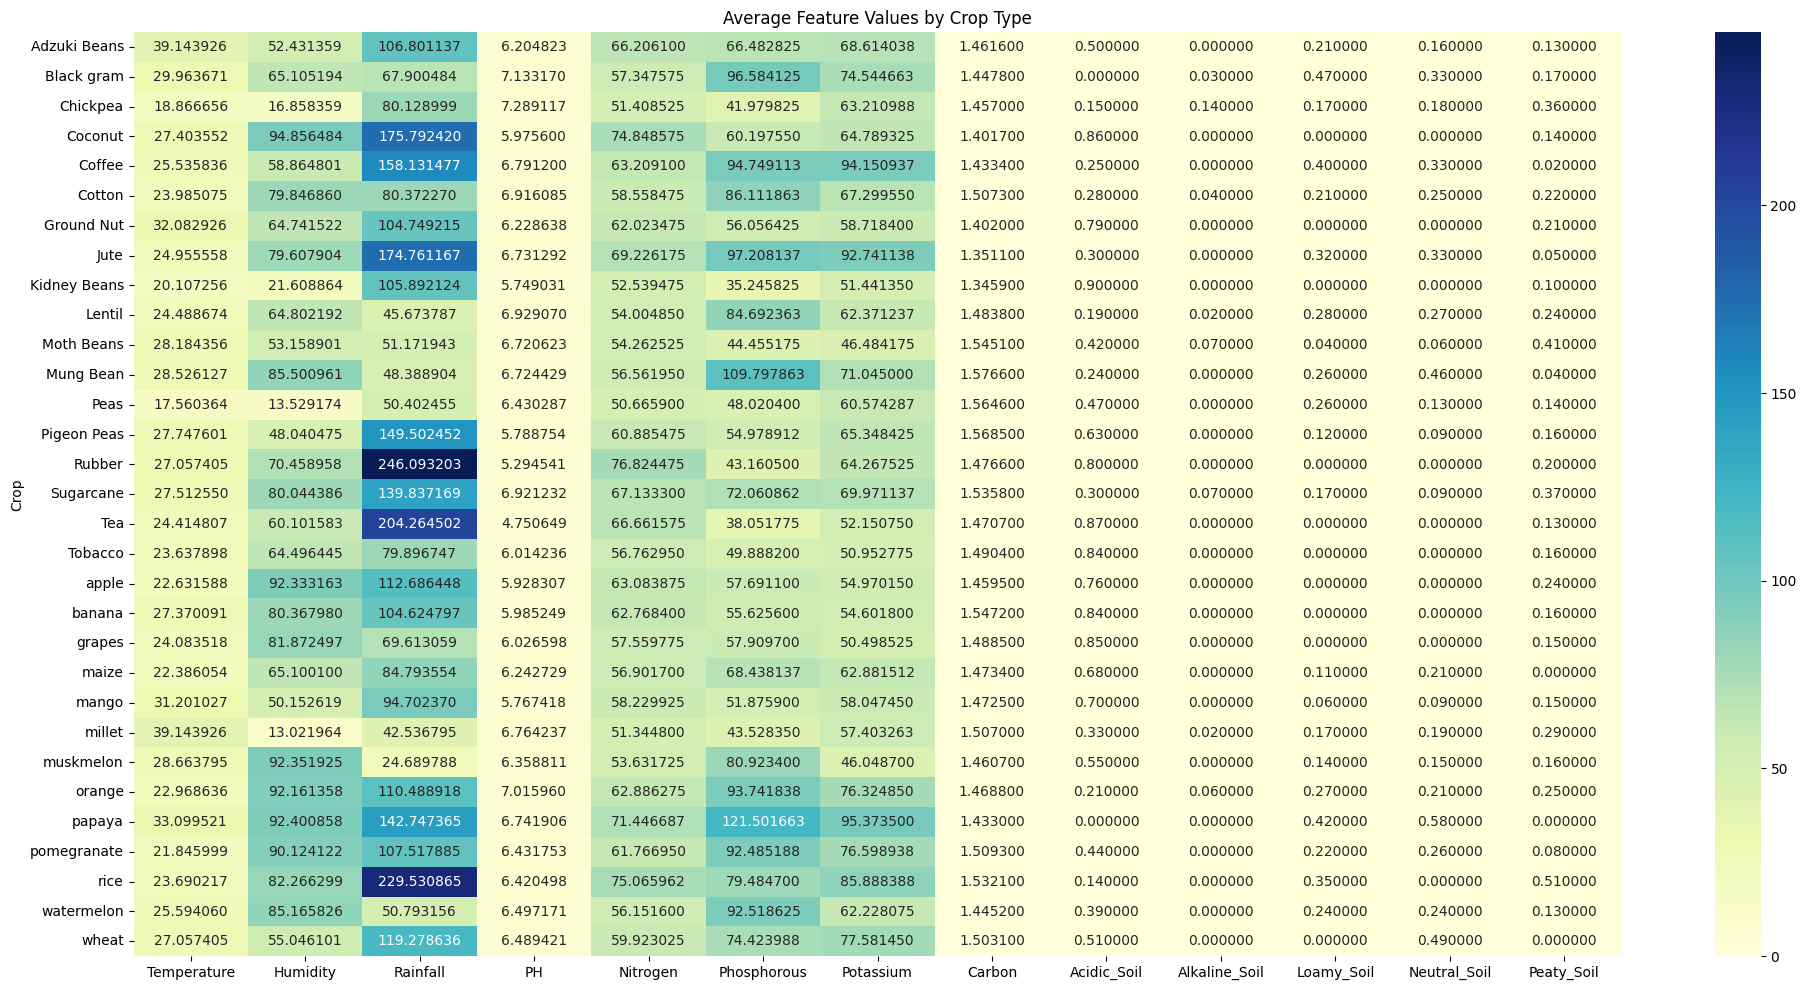

In [112]:
crop_mean = df.groupby('Crop').mean()
print(crop_mean)

plt.figure(figsize=(24, 12))
sns.heatmap(crop_mean, annot=True, cmap='YlGnBu',fmt='f')
plt.title('Average Feature Values by Crop Type')
plt.show()

In [114]:
df.head()

Temperature   Humidity    Rainfall        PH  Nitrogen  Phosphorous  \
0    20.879744  82.002744  202.935536  6.502985     69.30     79.50000   
1    21.770462  80.319644  226.655537  7.038096     72.02    137.64875   
2    23.004459  82.320763  255.531424  7.633568     77.77     59.39000   
3    26.491096  80.283629  242.864034  6.980401     78.65    137.64875   
4    20.280071  81.604873  255.531424  7.628473     73.98     68.95000   

   Potassium  Carbon  Crop  Acidic_Soil  Alkaline_Soil  Loamy_Soil  \
0   94.44000    0.63  rice          0.0            0.0         1.0   
1  107.84125    1.40  rice          0.0            0.0         1.0   
2   81.89000    1.80  rice          0.0            0.0         0.0   
3  107.84125    1.43  rice          0.0            0.0         1.0   
4   95.74000    1.75  rice          0.0            0.0         0.0   

   Neutral_Soil  Peaty_Soil  
0           0.0         0.0  
1           0.0         0.0  
2           0.0         1.0  
3           0.0         0.0  
4           0.0         1.0

In [116]:
label_encoder = LabelEncoder()
df['crop'] = label_encoder.fit_transform(df['Crop'])

In [118]:
df.head()

Temperature   Humidity    Rainfall        PH  Nitrogen  Phosphorous  \
0    20.879744  82.002744  202.935536  6.502985     69.30     79.50000   
1    21.770462  80.319644  226.655537  7.038096     72.02    137.64875   
2    23.004459  82.320763  255.531424  7.633568     77.77     59.39000   
3    26.491096  80.283629  242.864034  6.980401     78.65    137.64875   
4    20.280071  81.604873  255.531424  7.628473     73.98     68.95000   

   Potassium  Carbon  Crop  Acidic_Soil  Alkaline_Soil  Loamy_Soil  \
0   94.44000    0.63  rice          0.0            0.0         1.0   
1  107.84125    1.40  rice          0.0            0.0         1.0   
2   81.89000    1.80  rice          0.0            0.0         0.0   
3  107.84125    1.43  rice          0.0            0.0         1.0   
4   95.74000    1.75  rice          0.0            0.0         0.0   

   Neutral_Soil  Peaty_Soil  crop  
0           0.0         0.0    28  
1           0.0         0.0    28  
2           0.0         1.0    28  
3           0.0         0.0    28  
4           0.0         1.0    28

In [120]:
df['crop'].nunique()


31

In [124]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Temperature','Humidity','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon','Acidic_Soil','Alkaline_Soil','Loamy_Soil','Neutral_Soil','Peaty_Soil']])
X_scaled = pd.DataFrame(scaled_features, columns=['Temperature','Humidity','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon','Acidic_Soil','Alkaline_Soil','Loamy_Soil','Neutral_Soil','Peaty_Soil'])
y = df['crop']

In [126]:
df.shape

(3100, 15)

In [128]:
X_scaled.shape

(3100, 13)

In [130]:
y.shape

(3100,)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [136]:
model = RandomForestClassifier(random_state=42,n_estimators=500)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [138]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


In [140]:
cm = confusion_matrix(y_test,y_pred)

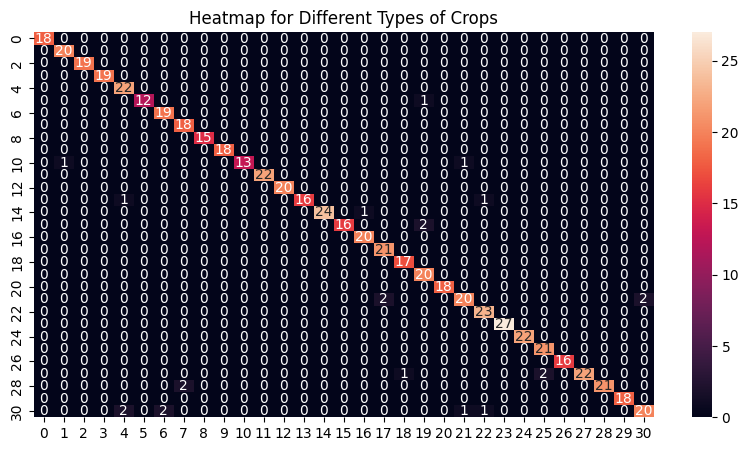

In [142]:
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.title("Heatmap for Different Types of Crops")
plt.show()

In [144]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.95      1.00      0.98        20
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        19
           4       0.88      1.00      0.94        22
           5       1.00      0.92      0.96        13
           6       0.90      1.00      0.95        19
           7       0.90      1.00      0.95        18
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00        18
          10       1.00      0.87      0.93        15
          11       1.00      1.00      1.00        22
          12       1.00      1.00      1.00        20
          13       1.00      0.89      0.94        18
          14       1.00      0.96      0.98        25
          15       1.00      0.89      0.94        18
          16       0.95      1.00      0.98        20
          17       0.91    

In [146]:
dump(model, "crop_recommendation.joblib")

['crop_recommendation.joblib']

In [148]:
dump(scaler, "scaler.joblib")

['scaler.joblib']

In [150]:
dump(label_encoder, "crop_encoder.joblib")

['crop_encoder.joblib']